# Import my Libraries and Stocks

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

In [2]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime.today()

data_dict = {}
tickers = ["HALO", "SIMO", "AMN", "CAMT"]

for key in tickers:
    data_dict[key] = web.DataReader(key, "yahoo", start, end)

In [3]:
# I like to use Adj close values because that reflects spilts and dividends
adj_close_data = pd.concat((df["Adj Close"] for df in data_dict.values()), keys = data_dict.keys(), axis = 1)

# Plot the Data

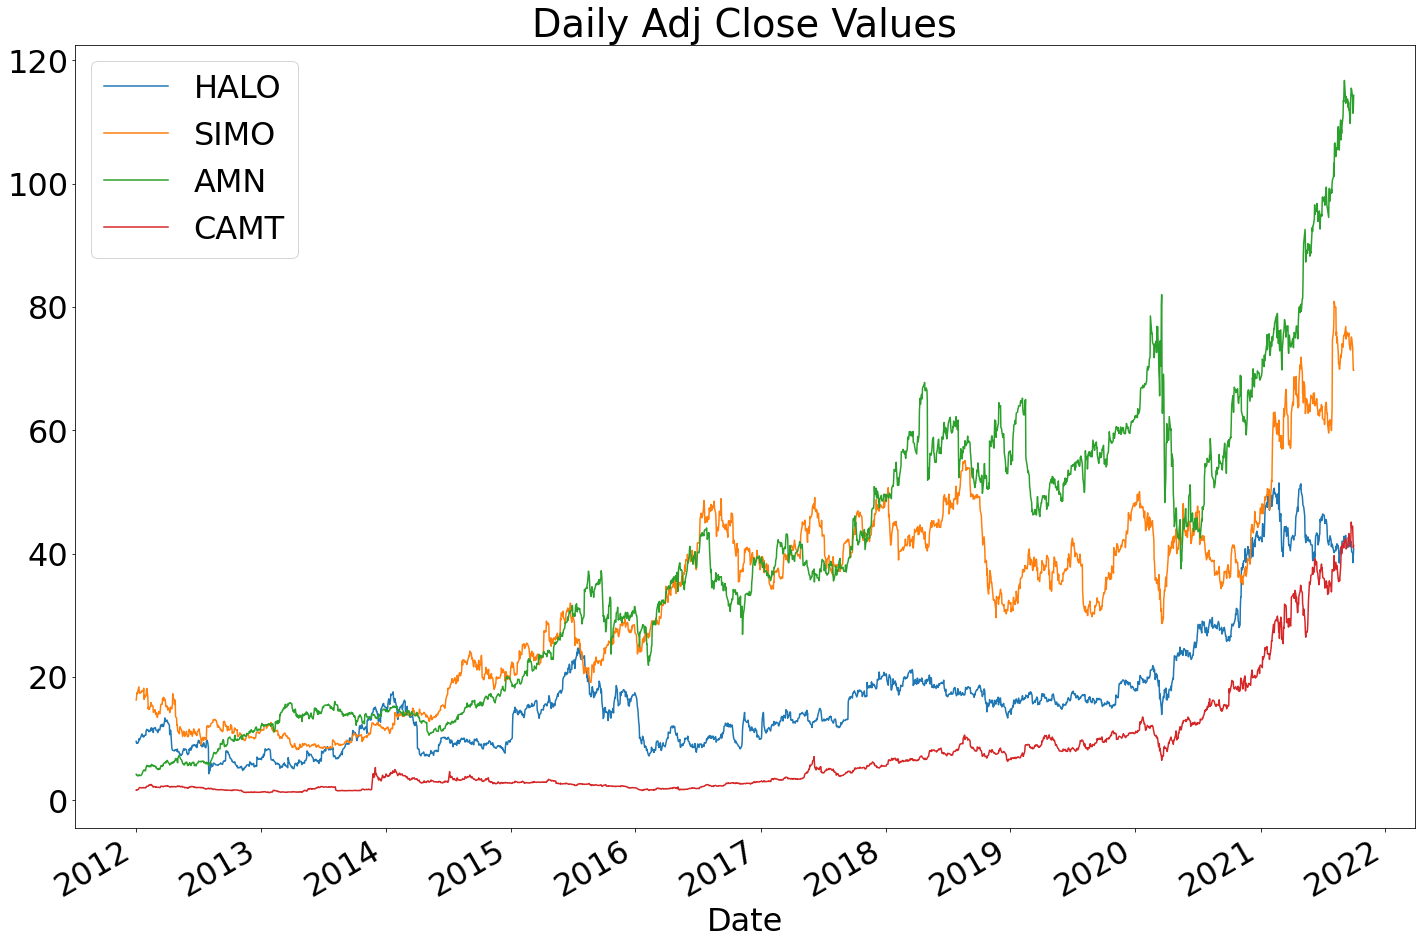

In [4]:
plt.rcParams.update({"font.size": 32})
fig, ax = plt.subplots(figsize = (24,16))
adj_close_data.plot.line(ax = ax, legend = True)

plt.title("Daily Adj Close Values")
plt.show()
plt.close();

# Normalize that Data

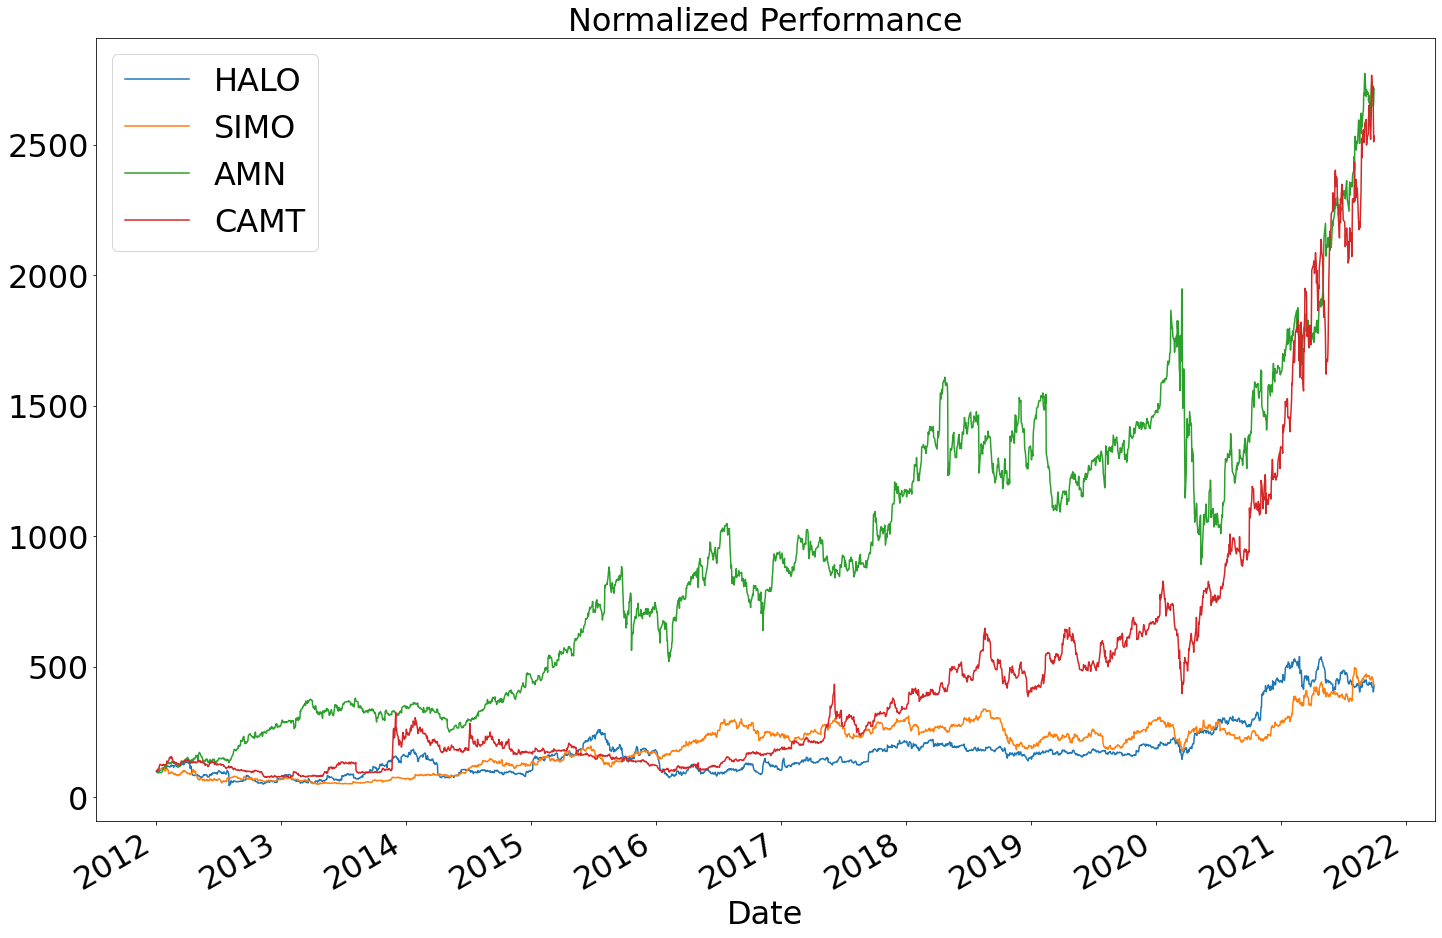

In [5]:
fig, ax = plt.subplots(figsize = (24,16))
(adj_close_data / adj_close_data.iloc[0] * 100).plot.line(legend = True, ax = ax)
plt.title("Normalized Performance", fontsize = 32,)
plt.show()
plt.close()

# Show the Log Values

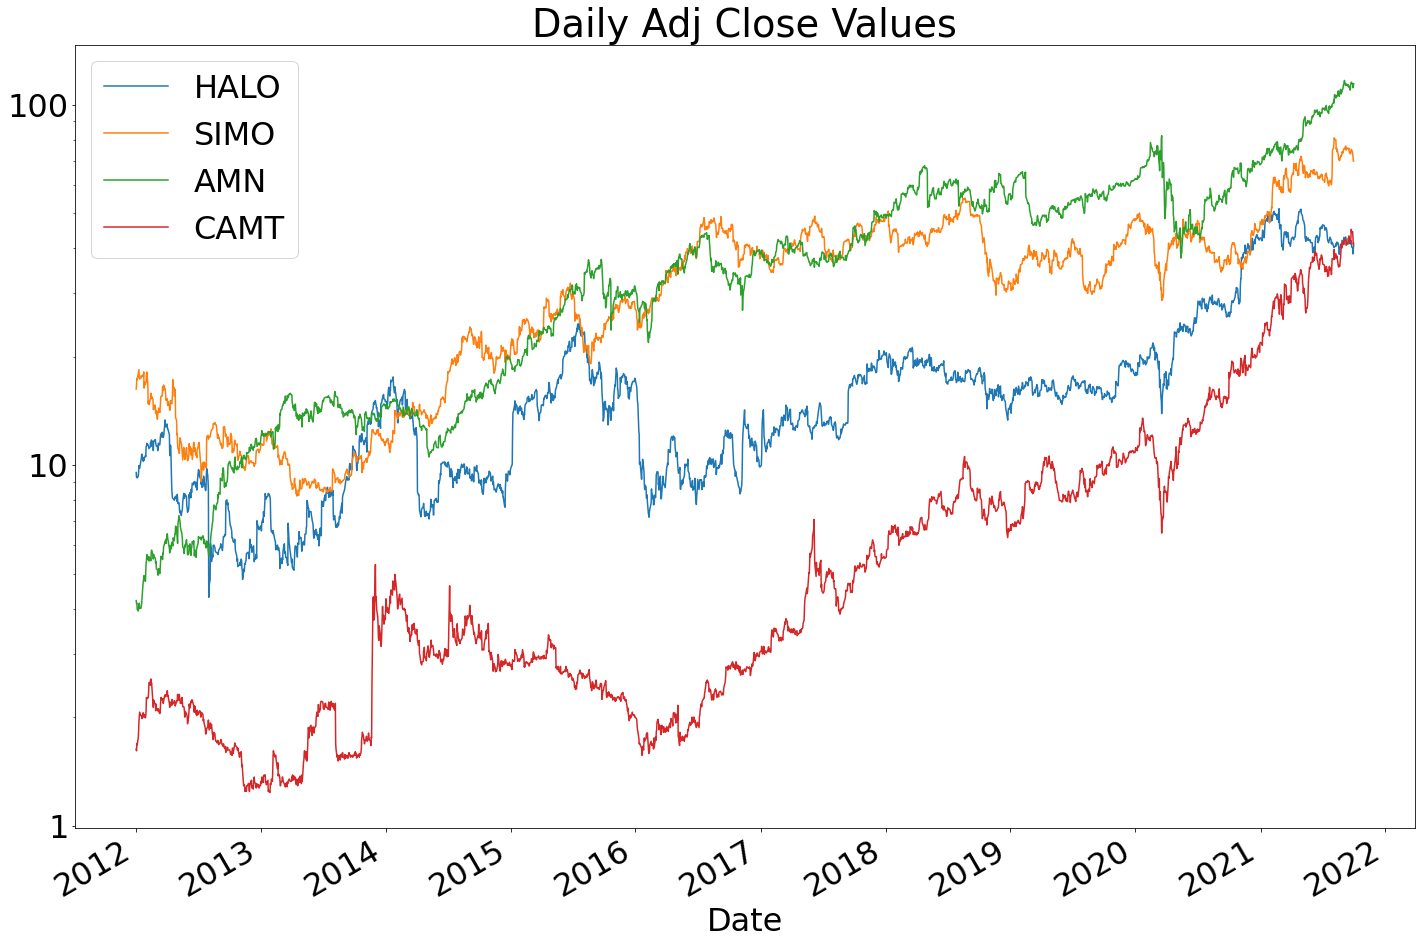

In [6]:
plt.rcParams.update({"font.size": 32})
fig, ax = plt.subplots(figsize = (24,16))
adj_close_data.plot.line(ax = ax, legend = True)

plt.title("Daily Adj Close Values")
ax.set_yscale("log")

plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0.01

y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y>=1 else round(y,1) for y in y_vals]);

# Find the Percent Changes

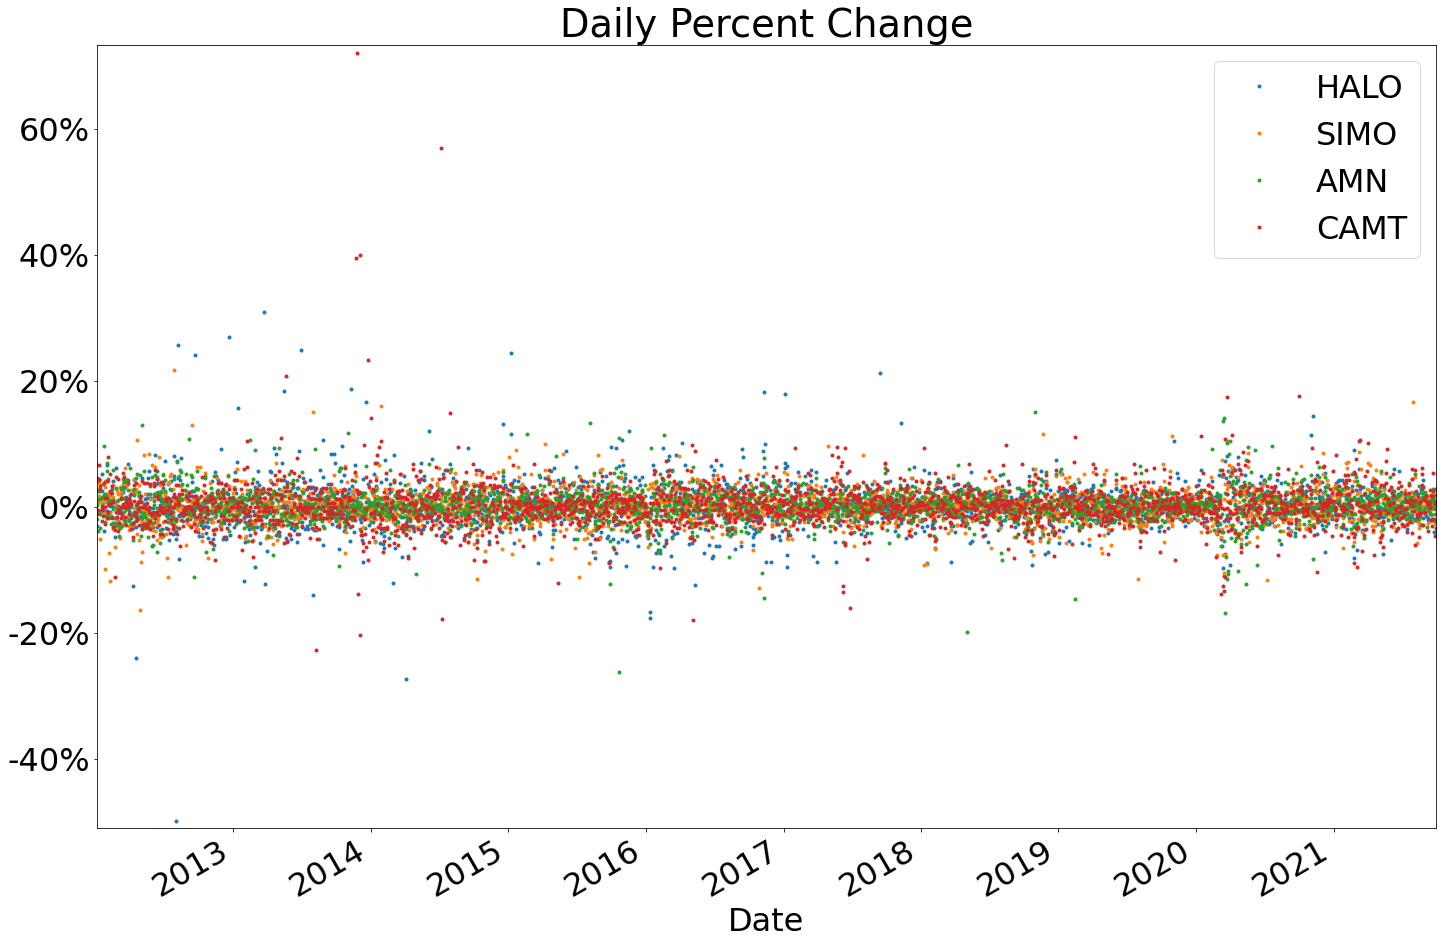

In [7]:
price_change_data = adj_close_data.pct_change() *100

plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Percent Change")

y_vals = ax.get_yticks()

ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

# Build My Statistic Functions

In [8]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

# Create a function that generates a datastructure with stats for each column of data

In [9]:
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)
    return stats_df    

In [10]:
stats_df = gather_statistics(price_change_data, 
                             sample = True)
stats_df

,HALO,SIMO,AMN,CAMT
mean,0.129,0.095,0.169,0.199
median,0.000,0.042,0.143,0.000
variance,13.599,7.194,6.713,14.638
S.D.,3.688,2.682,2.591,3.826
skewness,-0.176,0.306,-0.531,4.879
kurtosis,23.528,5.587,10.949,81.465


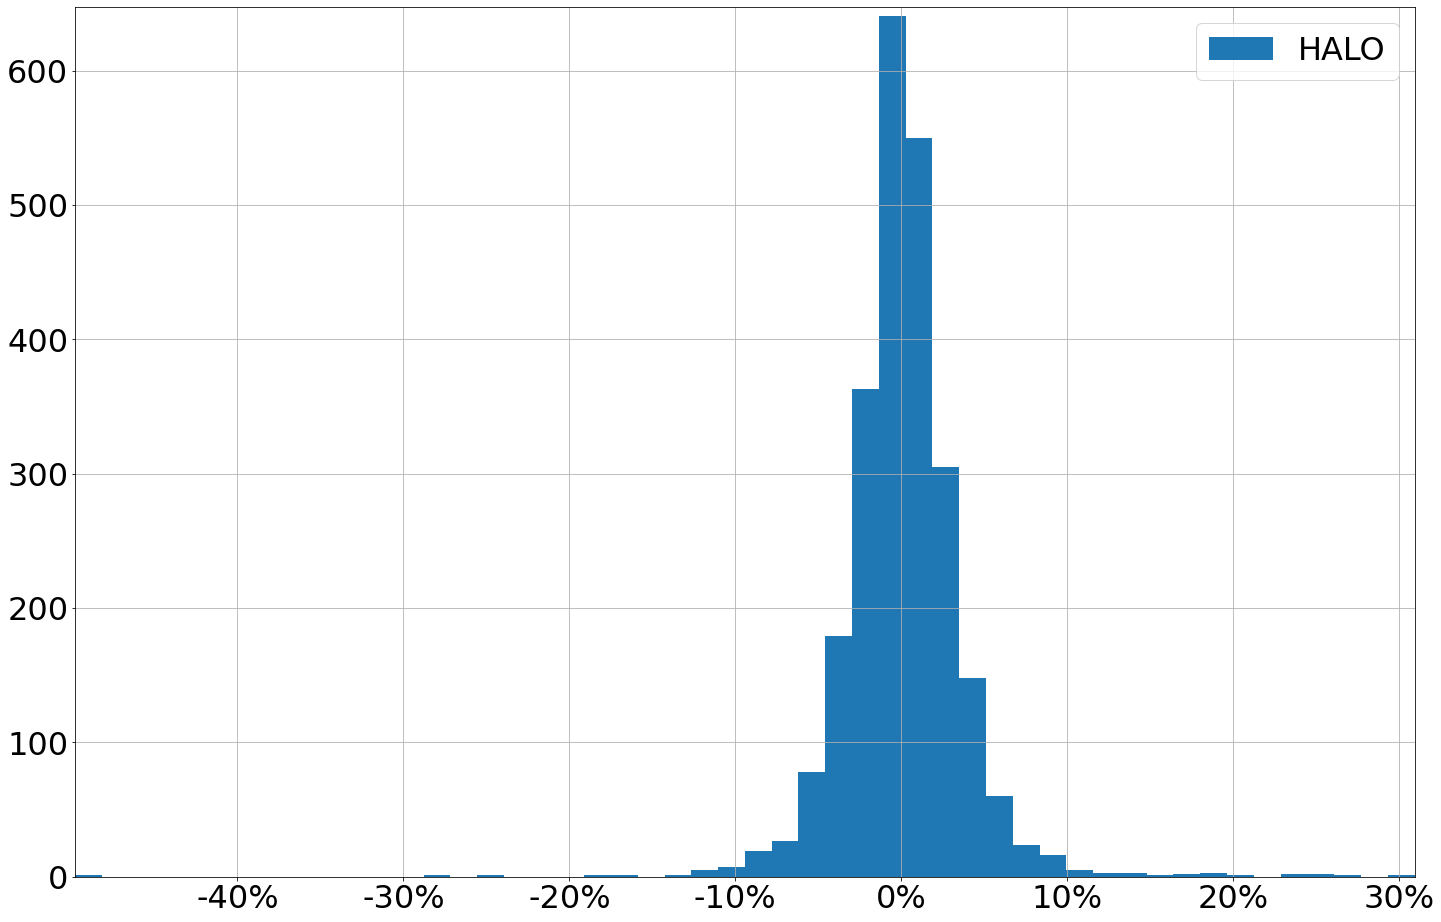

In [11]:
fig, ax = plt.subplots(figsize = (24,16))
price_change_data["HALO"].hist(bins = 50, label = "HALO")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
plt.legend();

## Instead of a Histogram with counts lets plot it with a density function

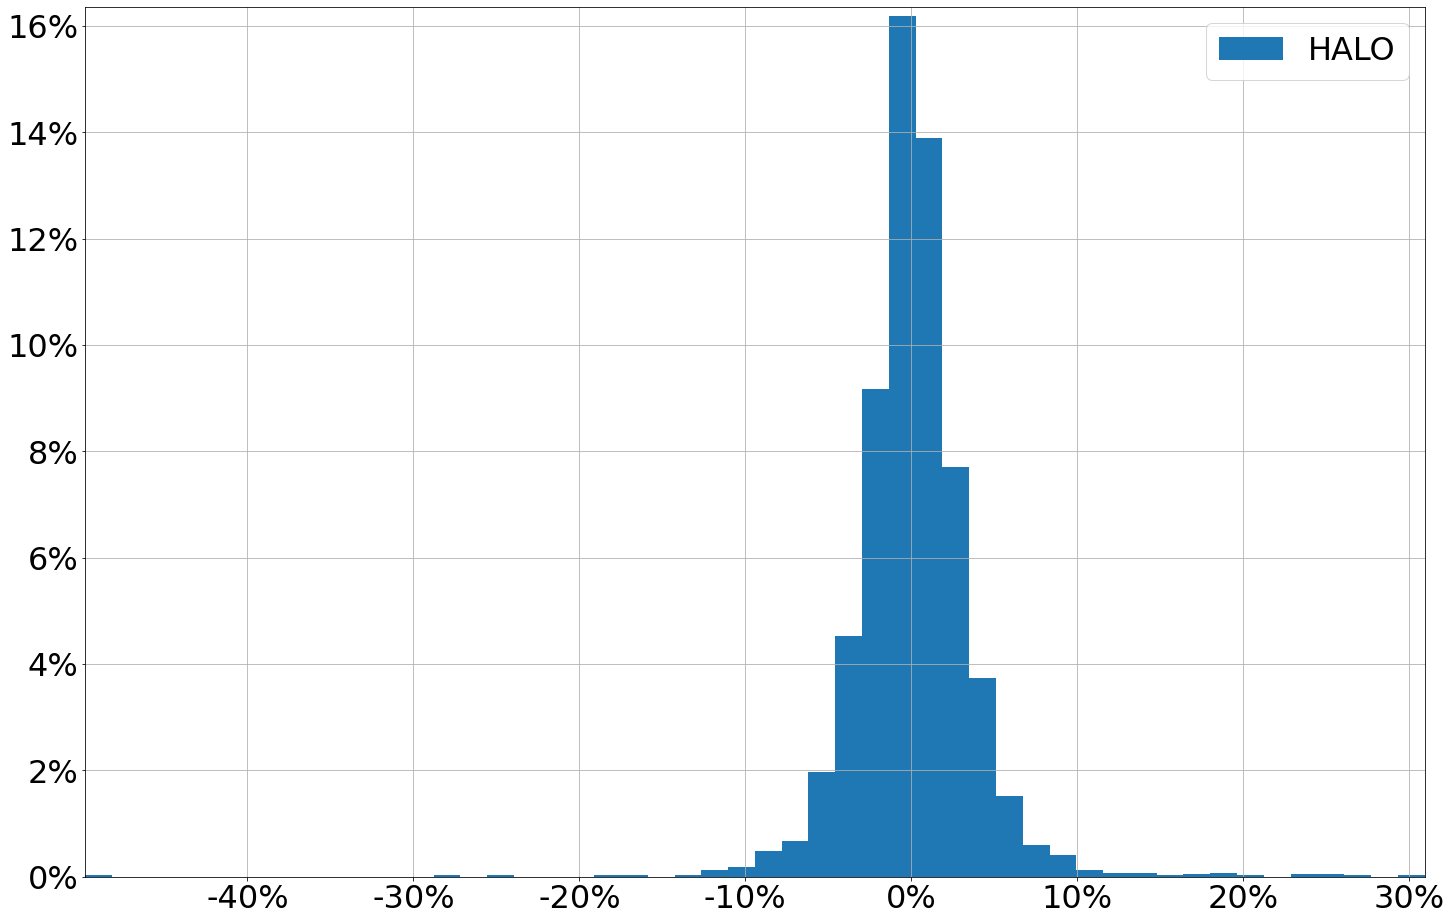

In [12]:
fig, ax = plt.subplots(figsize = (24,16))
price_change_data["HALO"].hist(bins = 50, label = "HALO", density = True)

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals]) 

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

plt.legend();

# Create 4 density plots

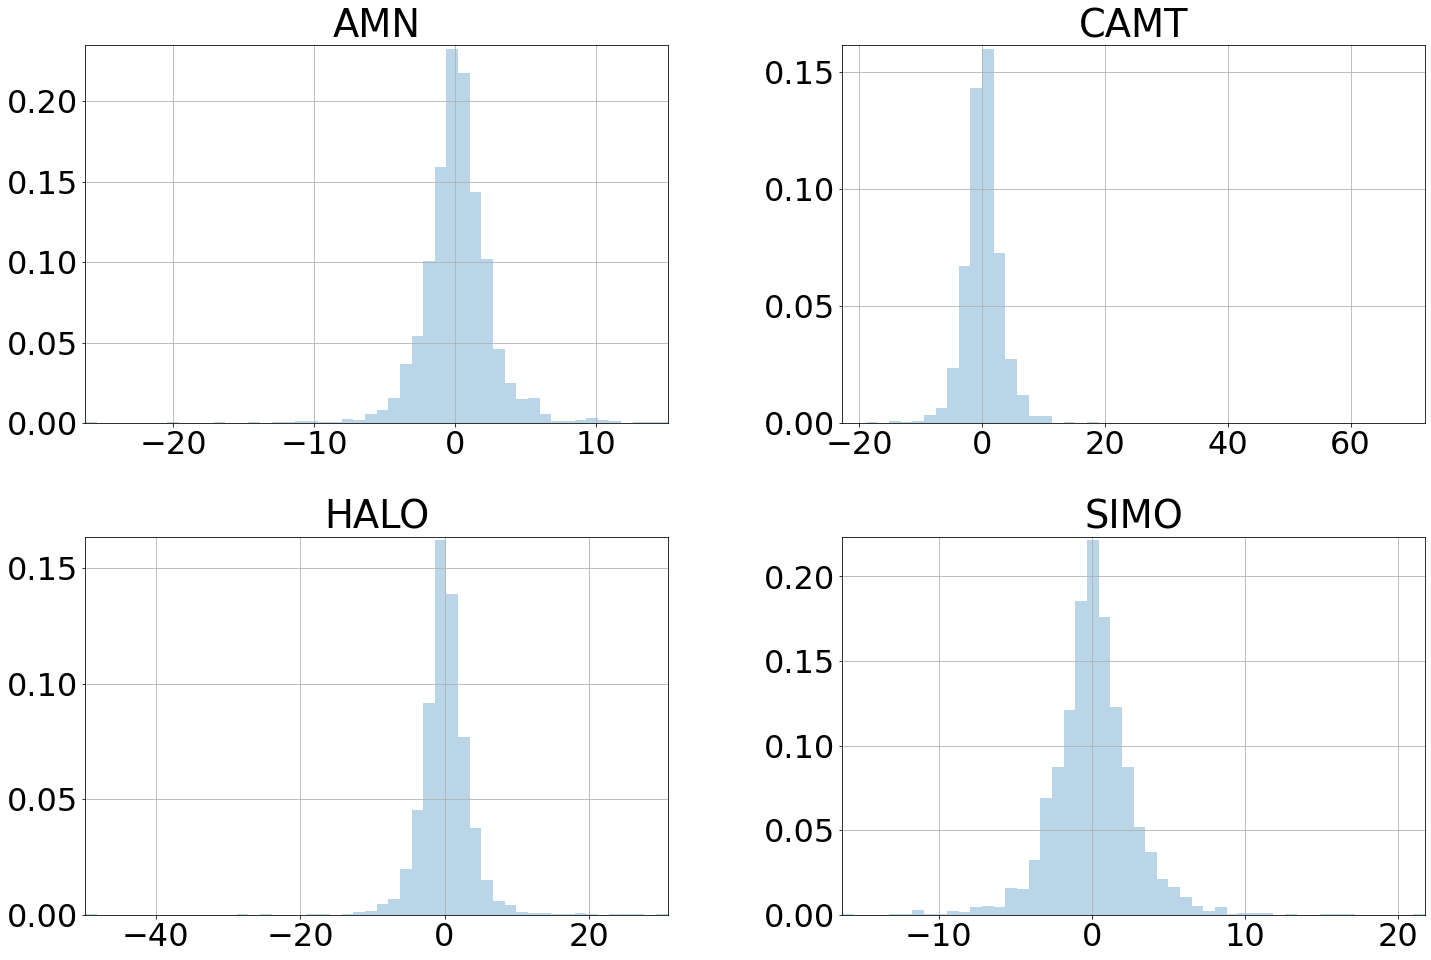

In [13]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
price_change_data.hist(bins = 50, 
                       alpha = 0.3,
                       label = price_change_data.keys(),
                       ax = ax, density = True);

# Create figure with 4 plots that shows the stats and fixes the x and y labels

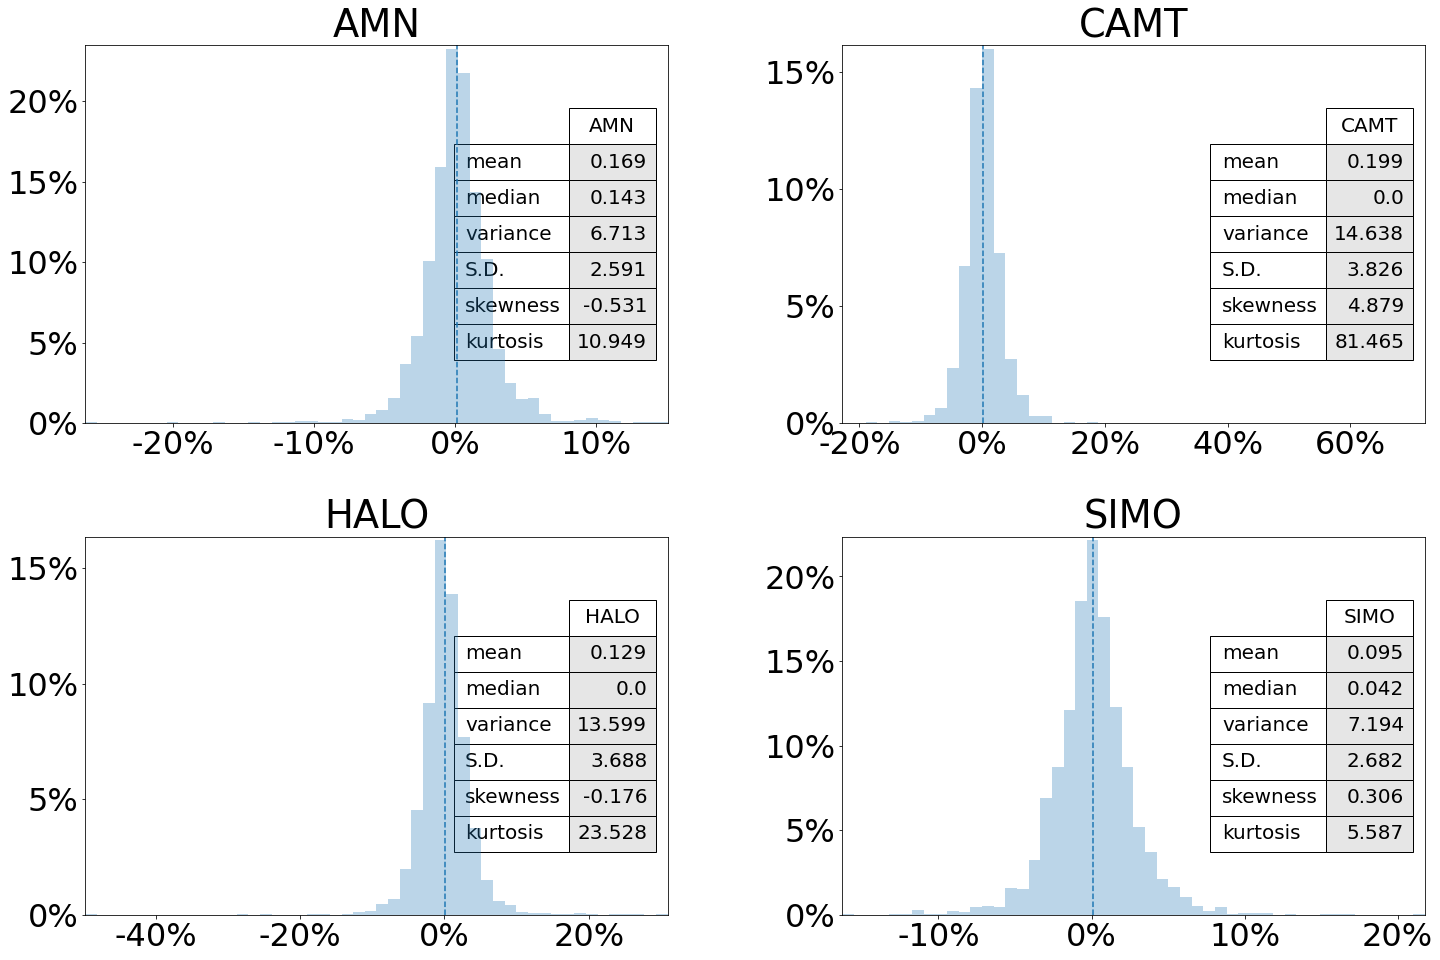

In [14]:
from pandas.plotting import table
fig, ax = plt.subplots(2,2, figsize = (24,16))
price_change_data.hist(bins = 50, 
                       alpha = 0.3,
                       label = price_change_data.keys(),
                       ax = ax, density = True)

for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        stock = a.get_title()
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x)) + "%" for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y*100))+ "%" for y in y_vals])
        hist_data = stats_df[stock]
        stats = table(a, hist_data, colWidths=[0.1], cellColours = [[(0.9,0.9,0.9)]]*6,loc = "center right")
        stats.scale(1.5,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        a.axvline(x = hist_data.loc["mean"], ls = "--")
        a.grid(False)
        
plt.show()
plt.close()

# Create these on a single plot

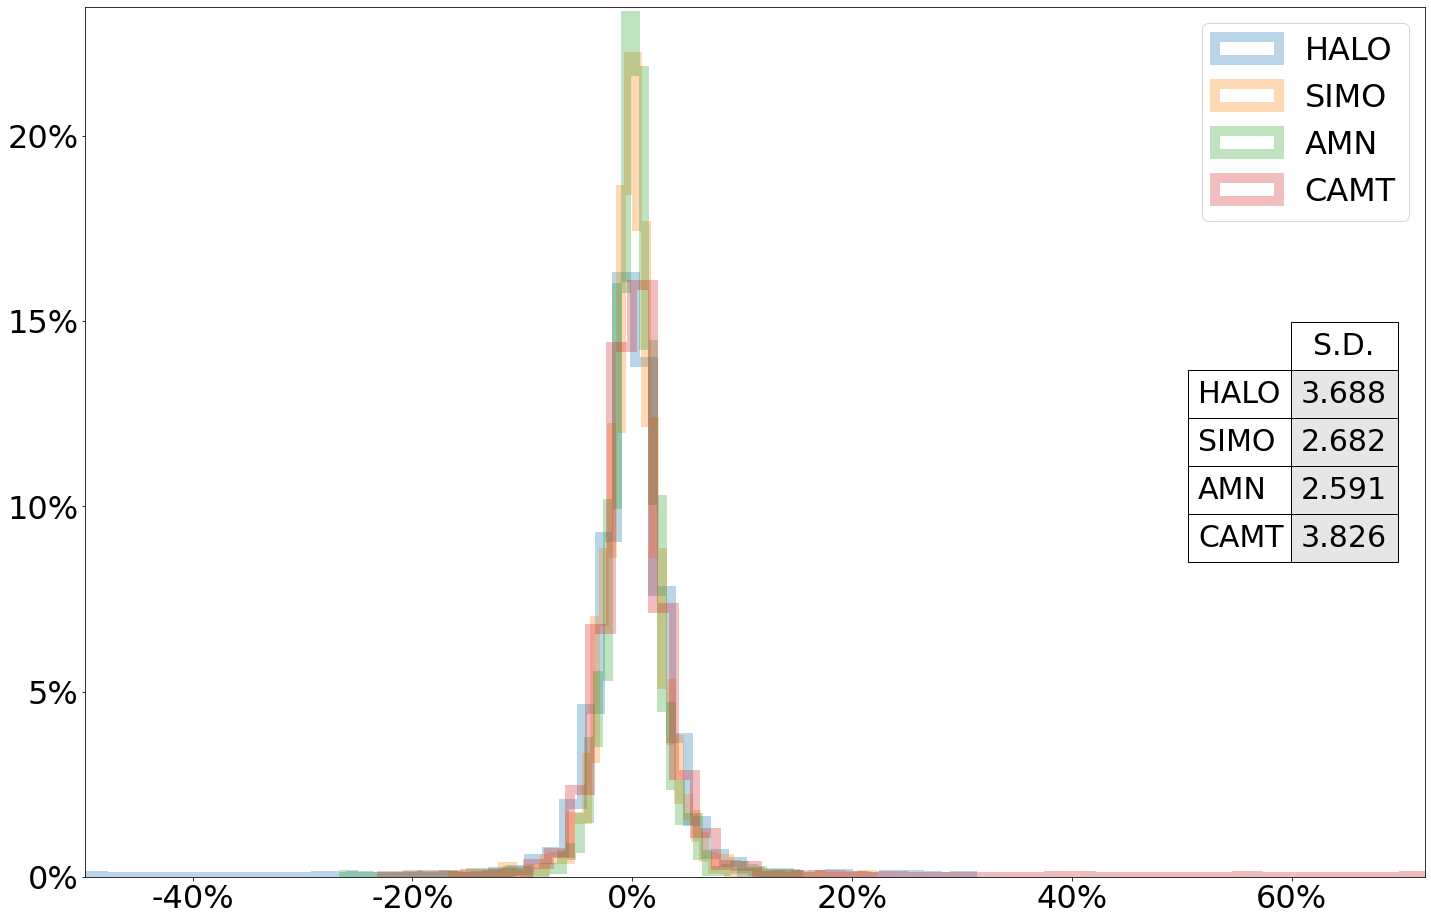

In [15]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, 
                                histtype = "step", 
                                alpha = .3, 
                                label = key, 
                                linewidth = 10, 
                                density = True)

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend();

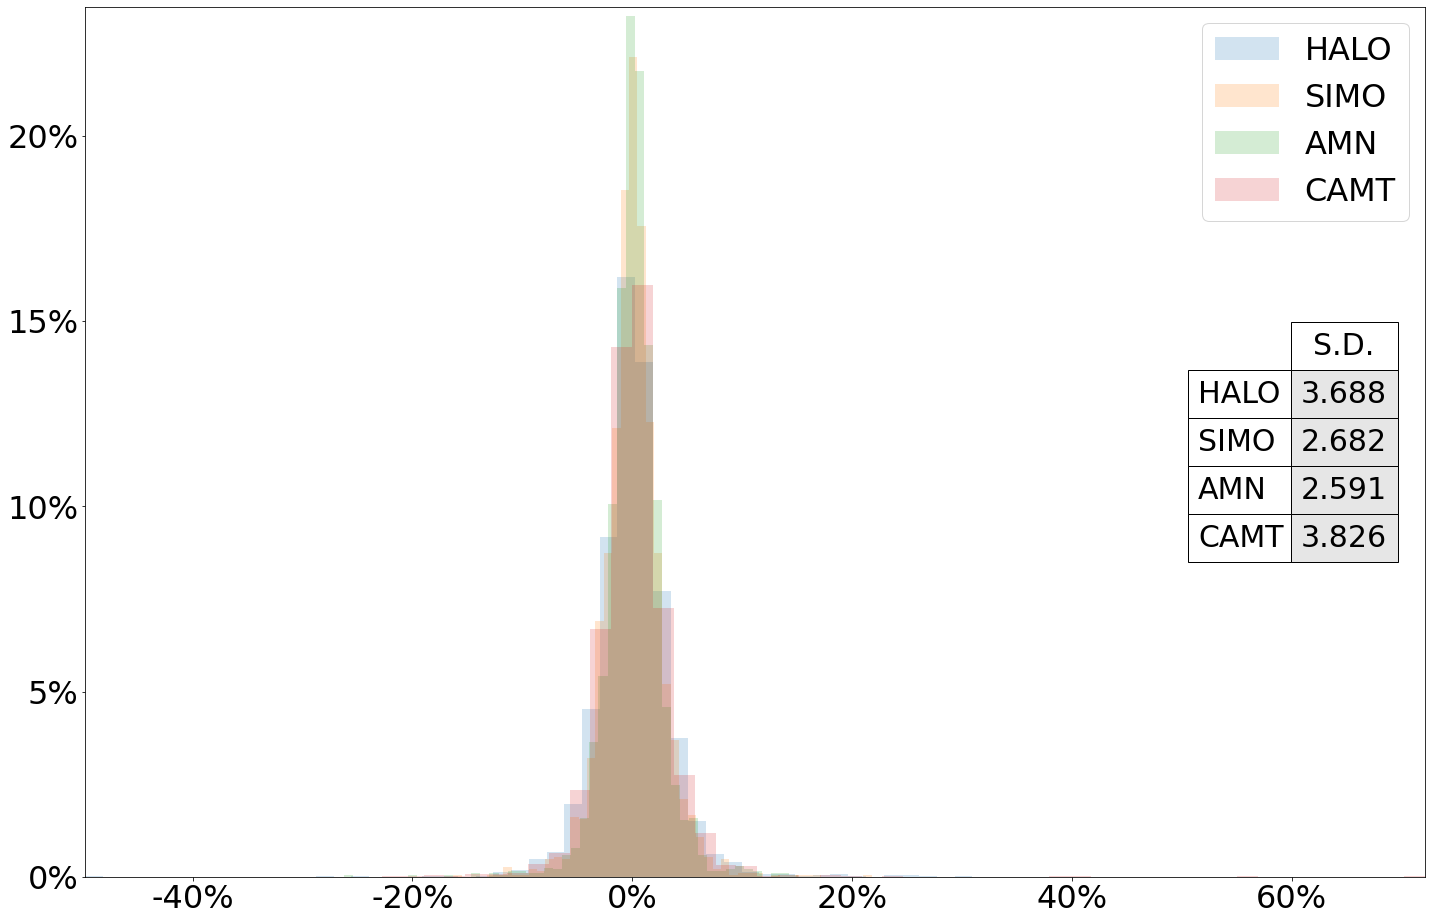

In [16]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, alpha = .2, label = key, 
                                density = True)

x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    

y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend();